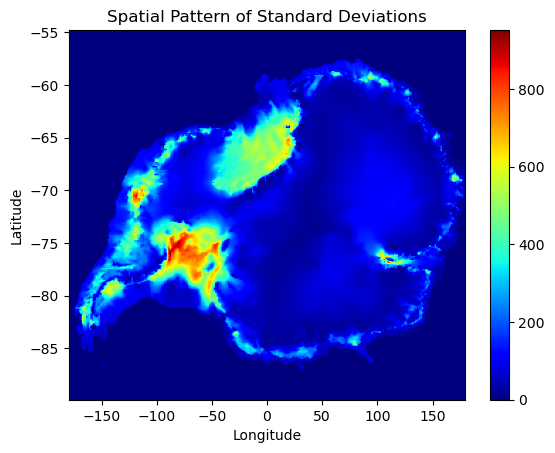

In [7]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_file = '/Users/kyra/documents/Summer23/test.nc'
dataset = xr.open_dataset(data_file)

slat = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lat_data.nc')
slat = slat.alatd
slon = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lon_data.nc')
slon = slon.alond

grid_points = dataset['h'][:]
std_devs_JYP = np.nanstd(grid_points, axis=0)

x1_length, y1_length = std_devs_JYP.shape

y = slat.data
x = slon.data

plt.imshow(std_devs_JYP, cmap='jet', extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
plt.colorbar()
plt.title('Spatial Pattern of Standard Deviations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

dataset.close()

/Users/kyra/anaconda3/envs/class/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/kyra/anaconda3/envs/class/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


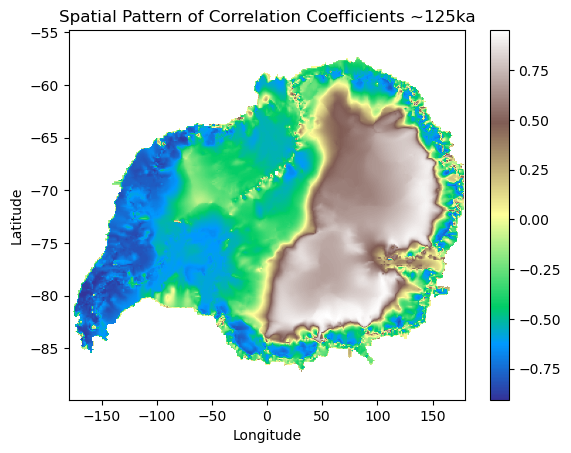

In [15]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean
import datetime
import seaborn as sns
from scipy import interpolate
import netCDF4 as nc

df = pd.read_csv('/Users/kyra/documents/Summer23/pCESM.3Ma_CO2_d18O_obPara.txt', delim_whitespace=True, header=None)
df.columns = ['Kiloyear', 'CO2','d18O from LR04','Eccentricity','Obliquity','Precession']
na = df.to_numpy()
co2_data = na[1750:3000, 1]

ice_time = np.arange(125,0,-0.1)
forc_time = na[1750:3000, 0]

f_linear = interpolate.interp1d(forc_time, co2_data, kind='linear', fill_value='extrapolate')
re_co2 = f_linear(ice_time+1)

slat = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lat_data.nc')
slat = slat.alatd
slon = xr.open_dataset('/Users/kyra/documents/Summer23/shout/lon_data.nc')
slon = slon.alond

y = slat.data
x = slon.data

gdf = '/Users/kyra/documents/Summer23/test.nc'
ds = xr.open_dataset(gdf)
grid_points = ds.h.to_numpy()

corr_coeffs = np.empty(grid_points.shape[1:])

for i in range(0, 280, 1):
    for j in range(0, 280, 1):
        corr_coeffs[i, j] = np.corrcoef(grid_points[:, i, j], re_co2)[0, 1]
        

plt.imshow(corr_coeffs, cmap='terrain', extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
plt.colorbar()
plt.title('Spatial Pattern of Correlation Coefficients ~125ka')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()